### 1. Basic Setup
Principal Component Analysis (PCA) is being used to reduce the dimensionality of data whilst retaining as much of information as possible. The general idea of PCA works as follows:

     a. Find the principal components from your original data
     b. Project your original data into the space spanned by principal components from (a)
 
 
Let's use $ \textbf{X} $ as our data matrix and $ \sum $ as our covariance matrix of $ \textbf{X} $. We will get eigenvectors ( $ \bf{v_1}, {v_2}, .....{v_k} $) and eigenvalues (${\lambda_1},{\lambda_2},....,{\lambda_k}$) from the covariance matrix $ \sum $, such that:

   $ \lambda_1 \geq \lambda_2 \geq ...... \lambda_k $
   
<span style="color:red"> NOTE* </span> : Elements of the vector ($ \bf{v_1} $ ) represents the coefficients of principal components.

Our goal is to maximize the variance of projection along each of principal components. This can be written as:

$ \bf{var(y_i)} = \bf{var}(v_{i1} * X_1 + v_{i2} * X_2 + ...... + v_{ik} * X_k ) $

You can see that, we are projecting the original data into our new vector space given by PCs.

<span style="color:red"> NOTE* </span> : $ \bf{var(y_i)} = \lambda_i $ and principal components are uncorrelated i.e $ cov(y_i, y_j) $ = 0

### 2. Principal Component Analysis Algorithm (Pseudocode)

a. $ \textbf{X} \gets $ design data matrix with dimension ( N*k )

b. $ \textbf{X} \gets $ subtract mean from each column vector of $ \bf{X} $

c. $ \sum  \gets $ compute covariance matrix of $ \bf{X} $

d. Calculate eigenvectors and eigenvalues from $ \sum $ 

e. Principal Components (PCs) $ \gets $ the first M eigenvectors with largest eigenvalues.

### 3. Basic Data Analysis

<!-- TEASER_END -->

In [159]:
%matplotlib inline

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd 

from sklearn.preprocessing import StandardScaler

In [160]:
df = pd.read_csv(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None, sep=',')

df.columns = ['CLASS', 'ALCOHOL_LEVEL', 'MALIC_ACID', 'ASH', 'ALCALINITY','MAGNESIUM', 'PHENOLS', 
              'FLAVANOIDS', 'NON_FLAVANOID_PHENOL', 'PROANTHOCYANINS', 'COLOR_INTENSITY', 
              'HUE', 'OD280/OD315_DILUTED','PROLINE']
df.head()

,CLASS,ALCOHOL_LEVEL,MALIC_ACID,ASH,ALCALINITY,MAGNESIUM,PHENOLS,FLAVANOIDS,NON_FLAVANOID_PHENOL,PROANTHOCYANINS,COLOR_INTENSITY,HUE,OD280/OD315_DILUTED,PROLINE
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [161]:
features = ['ALCOHOL_LEVEL', 'MALIC_ACID', 'ASH', 'ALCALINITY','MAGNESIUM', 'PHENOLS', 
              'FLAVANOIDS', 'NON_FLAVANOID_PHENOL', 'PROANTHOCYANINS', 'COLOR_INTENSITY', 
              'HUE', 'OD280/OD315_DILUTED','PROLINE']
label = 'CLASS'

X = df[features]
y = df[label]

In [162]:
df.columns[1 :]

Index(['ALCOHOL_LEVEL', 'MALIC_ACID', 'ASH', 'ALCALINITY', 'MAGNESIUM',
       'PHENOLS', 'FLAVANOIDS', 'NON_FLAVANOID_PHENOL', 'PROANTHOCYANINS',
       'COLOR_INTENSITY', 'HUE', 'OD280/OD315_DILUTED', 'PROLINE'],
      dtype='object')

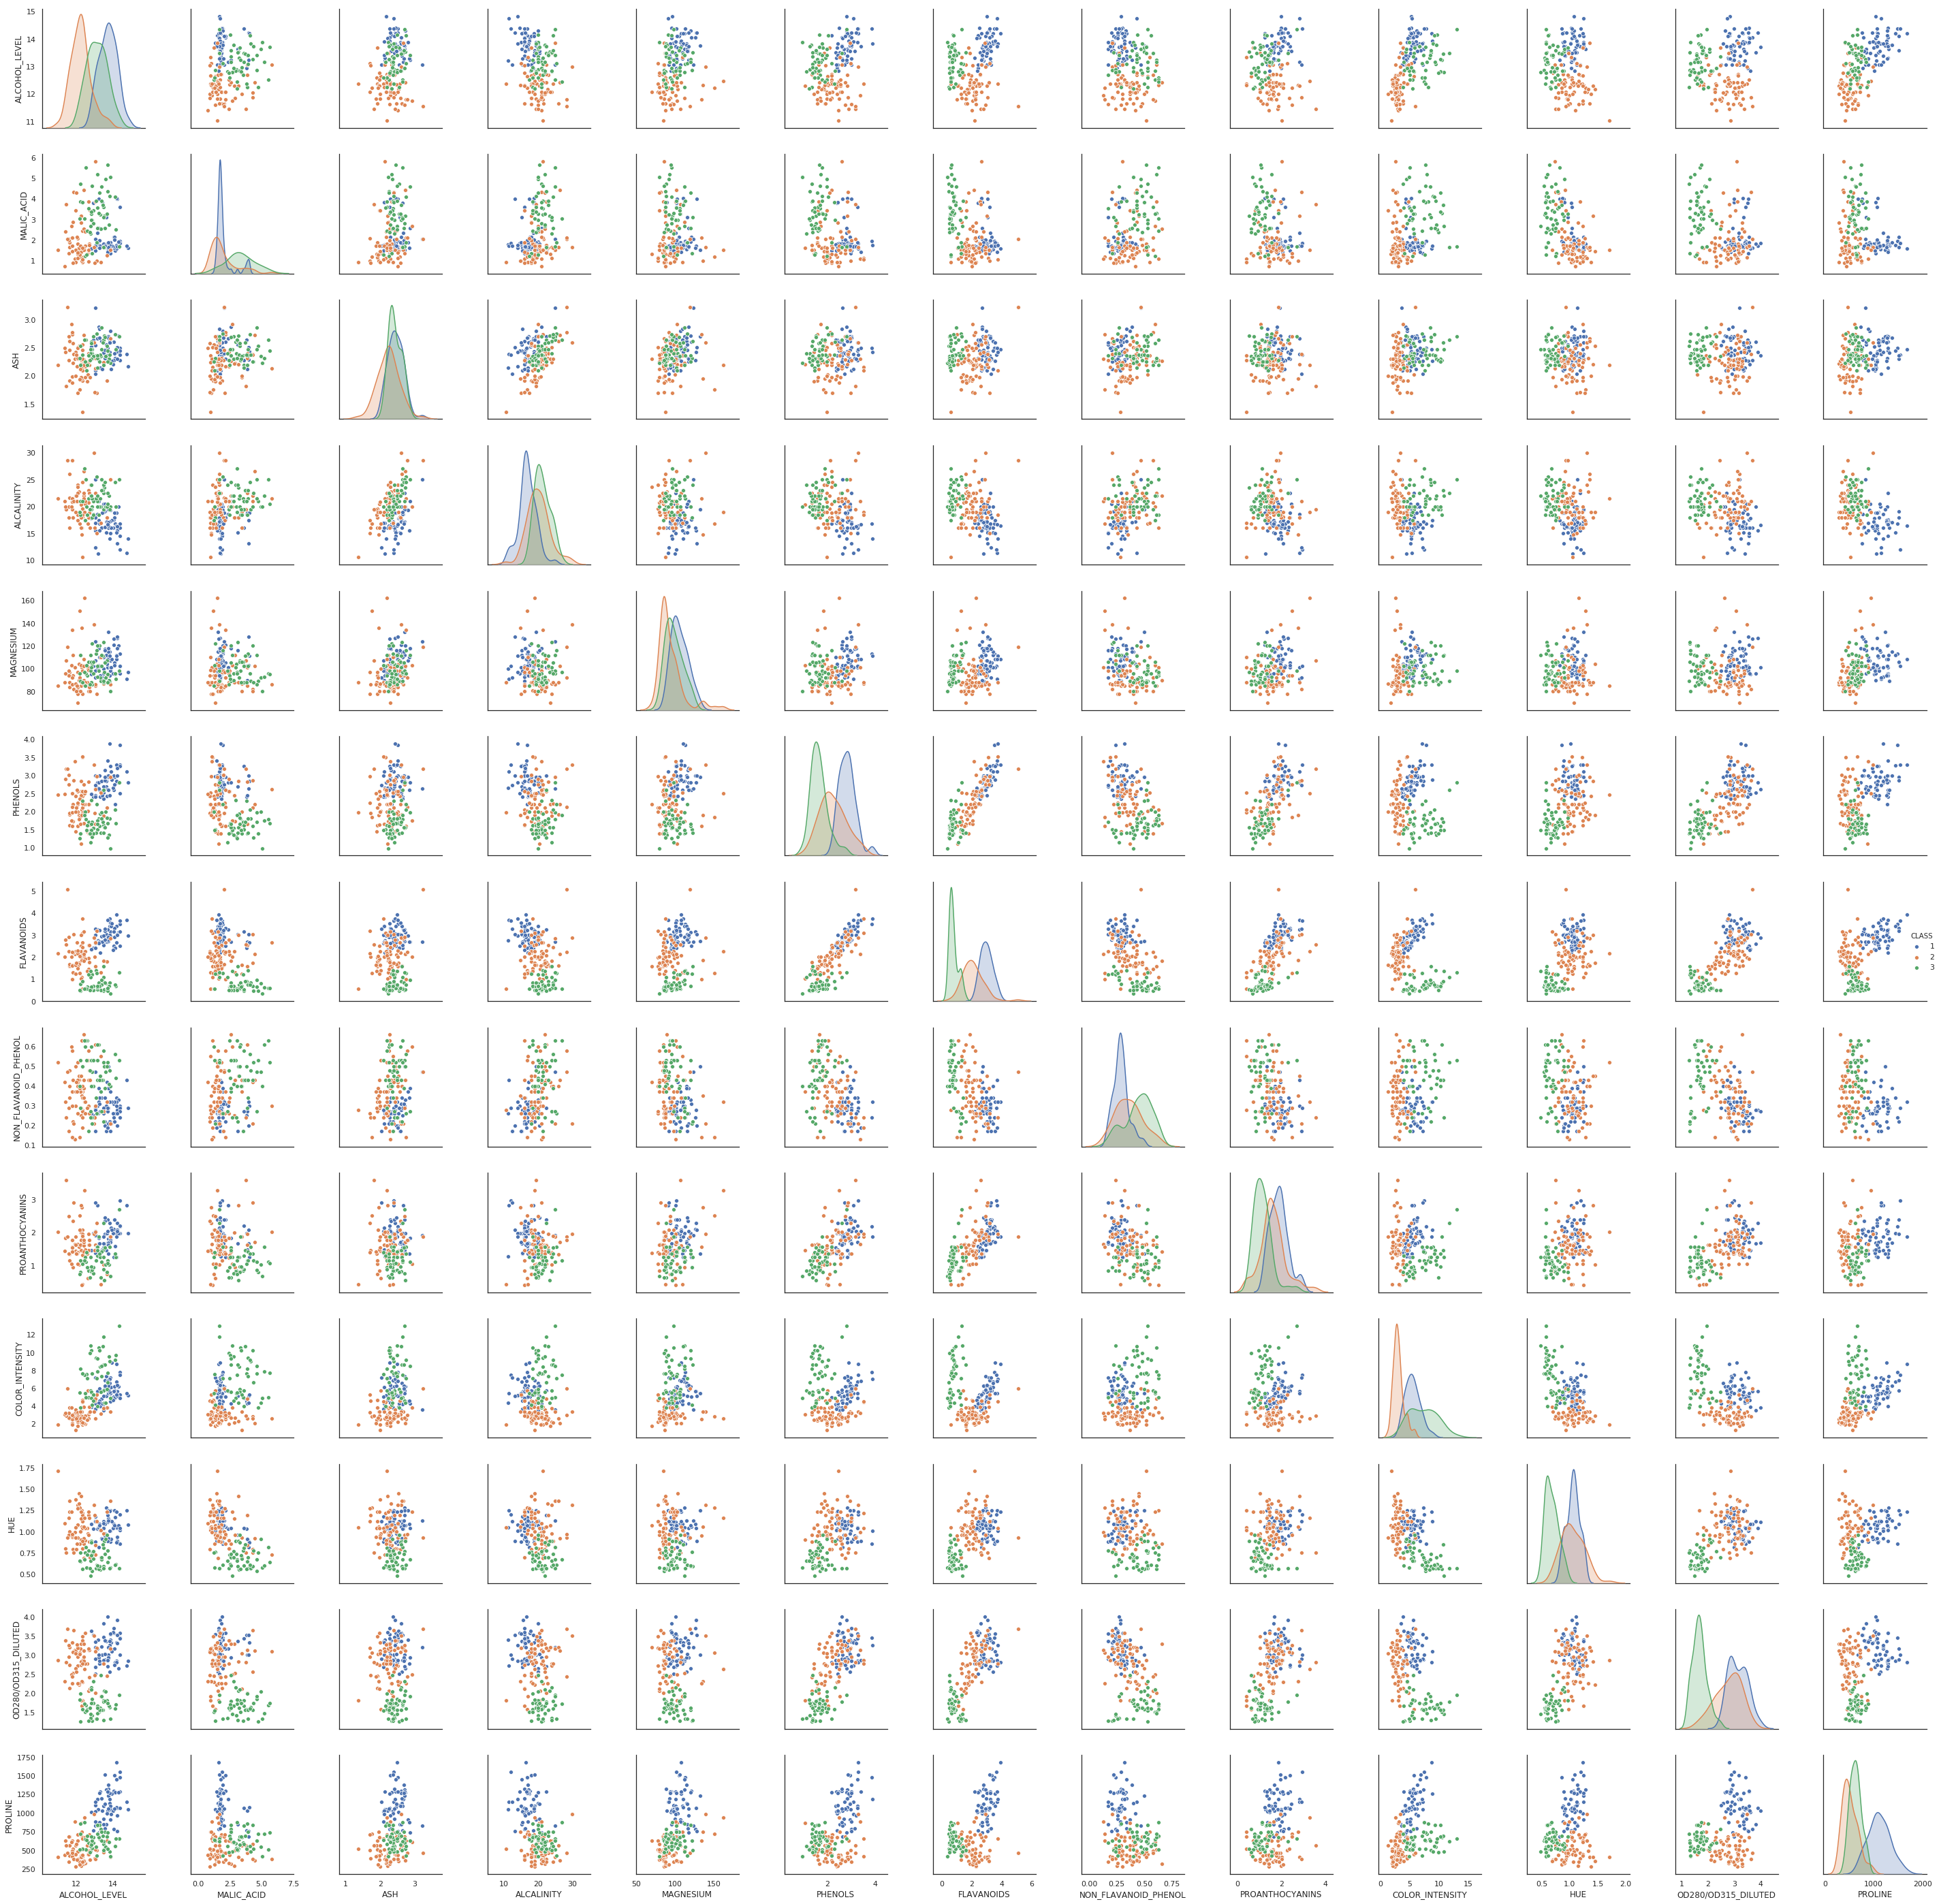

In [163]:
sns.set(style = 'white')

sns.pairplot(df, vars = X.columns, hue = "CLASS", height = 3)
plt.tight_layout()
plt.show()

We can only observe one linear relation between 'PHENOLS', 'FLAVANOIDS'. Even with 13 variables, it will be difficult to find the relation/pattern in the data. So, we need to reduce the dimensionality of the data to observe the better patterns.
    

### 4. Correlation Matrix

PCA is not invariant to scaling. So, the solution we get from covariance will be different than that we get from Correlation matrix. 
Correlation measures the linear relation between two variables when they are normalized, and can be written as :

$ Corr(X_1, X_2) $ = $ \frac{Cov(X_1, X_2)}{Var(X_1) Var(X_2)} $

We can estimate the correlation using : $ \hat{R} = \frac{1}{N} Z^T Z $, where Z represents the normalized data as : $ z_1 = \frac{X_1 - \mu_1}{\sigma_1} $

In [170]:
# standar scaler for normalization
N, _ = df.shape
scaler = StandardScaler()
Z = scaler.fit_transform(X)
# Correlation estimation
R = np.dot(Z.T, Z) / N

In [171]:
df.shape[0], N

(178, 178)

### 5. Eigendecomposition of Correlation Matrix

In [172]:
eigen_values, eigen_vectors = np.linalg.eig(R)

### 6.  Principal Components Selection

We use the variance exlained ratio ( = $ \frac{\lambda_i}{\sum_{i=1}^K \lambda_i} $ ) to select the components covering lots of information from original data in terms of variance.

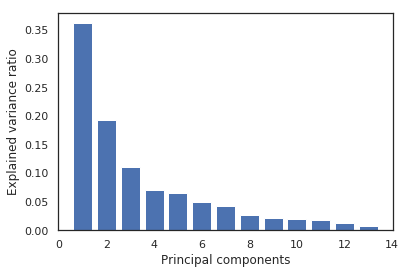

In [173]:
total_var = sum(np.abs(eigen_vals))
var_explained = [(i / total_var) for i in sorted(np.abs(eigen_values), reverse=True)]
cum_var_explained = np.cumsum(var_explained)

plt.bar(range(1, eigen_values.size + 1), var_explained)
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.show()

We can see that first two principal components can explain almost 50% variance in the data. Let's select those two components for the visualization.

### 7. Projection Matrix


We select 2 PCs having largest eigenvalues and build our projection matrix.

In [174]:
value_idx = eigen_values.argsort()[::-1]
eigen_vectors_sorted = eigen_vectors[:, value_idx]

In [175]:
# adding new dimension with np.newaxis
M = np.hstack((eigen_vectors_sorted[0][:, np.newaxis],
               eigen_vectors_sorted[1][:, np.newaxis]))
M.shape

(13, 2)

### 8. Project Original Data to PCs space

projected_data = Z * M

In [176]:
projected_data = np.asmatrix(Z) * np.asmatrix(M)
projected_data.shape

(178, 2)

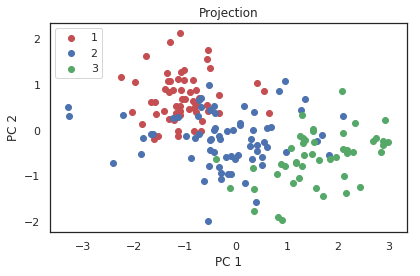

In [177]:
colors = ['r', 'b', 'g']
for label, color in zip(np.unique(y.values), colors):
    idx = df[df['CLASS']==label].index.values.astype(int)
    x_axis_vals = projected_data[idx, 0]
    y_axis_vals = projected_data[idx, 1]
    plt.scatter([x_axis_vals], [y_axis_vals], c=color, label=label)

plt.title('Projection')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

We can see that class 1 is clustered more on the left side, blue on at the middle and green class at the right side of the projection plot. It seems like a simple linear classifier might give moderate result in our classification. But, for more accurate result, we should use polynomial/kernel based classification methods.

### 9. Projection Matrix with 3 PCs

In [178]:
# adding new dimension with np.newaxis
M2 = np.hstack((eigen_vectors_sorted[0][:, np.newaxis],
               eigen_vectors_sorted[1][:, np.newaxis],
               eigen_vectors_sorted[2][:, np.newaxis]))
M2.shape

(13, 3)

In [179]:
projected_data2 = np.asmatrix(Z) * np.asmatrix(M2)
projected_data2.shape

(178, 3)

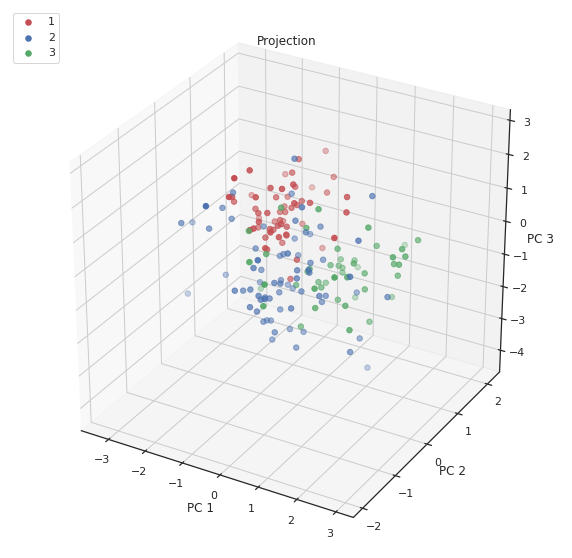

In [180]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')



colors = ['r', 'b', 'g']
for label, color in zip(np.unique(y.values), colors):
    idx = df[df['CLASS']==label].index.values.astype(int)
    x_axis_vals = projected_data2[idx, 0]
    y_axis_vals = projected_data2[idx, 1]
    z_axis_vals = projected_data2[idx, 2]
    ax.scatter([x_axis_vals], [y_axis_vals], [z_axis_vals], c=color, label=label, s=30)

plt.title('Projection')
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')
ax.legend(loc='upper left')
plt.show()